**IMPORT NECESSARY LIBRARIES FOR THE PROJECT**

In [1]:
# import the modules

import pandas as pd
import numpy as np


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
df_train = pd.read_csv(r"C:\Users\nidhi\Desktop\Hackton\Car Insurance Claim\data\train.csv")
df_test = pd.read_csv(r"C:\Users\nidhi\Desktop\Hackton\Car Insurance Claim\data\test.csv")

df_train.drop(columns='Unnamed: 0',inplace=True)
df_test.drop(columns='Unnamed: 0',inplace=True)


# Code ends here

In [3]:
df_train.head()


,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,z_F,...,1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,z_F,...,16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,z_F,...,13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,z_F,...,4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,M,...,1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


Obersvation:
* ID: its total number of id (need to check if there is any duplicate values/ids)
* KIDSDRIV: check null values and unique character 
* AGE: need normalization (can be changed from float to int)
* HOMEKIDS: can be dropped (domain knowledge required)
* YOJ: replace nan values to median/mode value
* INCOME: remove $ and , 
* PERENT1: convert to binary values by onehot encoding
* HOME VAL: remove $ and ,
* MSTATUS: convert to binary values by onehot encoding
* GENDER: convert to binary values by onehot encoding
* BLUEBOOK: domain knowledge required
* 

In [4]:
df_test.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,968418547,0,36.0,2,14.0,"$58,833",No,"$193,644",Yes,M,...,"$17,680",1,Van,yes,$0,0,Yes,2,"$4,611",11.0
1,59213729,0,47.0,0,NaN,"$35,259",No,$0,z_No,M,...,"$12,850",4,Minivan,no,"$1,304",1,No,5,$0,14.0
2,653092892,0,48.0,0,11.0,"$126,442",No,$0,z_No,M,...,"$7,820",7,Pickup,yes,$0,0,No,0,$0,12.0
3,475325469,0,46.0,0,9.0,"$71,192",No,"$263,204",Yes,z_F,...,"$6,360",1,z_SUV,no,$0,0,No,0,$0,18.0
4,837299054,0,46.0,0,12.0,"$67,381",No,"$226,928",Yes,z_F,...,"$27,630",4,Pickup,no,"$6,149",3,No,4,$0,9.0


In [5]:
df_train.shape

(8241, 25)

In [6]:
cat_var = df_train.select_dtypes(exclude="number")

In [7]:
cat_var.columns

Index(['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION',
       'OCCUPATION', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'REVOKED', 'CLM_AMT'],
      dtype='object')

In [8]:
print(df_train['GENDER'].unique())
print(df_train['EDUCATION'].unique())
print(df_train['OCCUPATION'].unique())
print(df_train['BLUEBOOK'].unique())
print(df_train['CAR_TYPE'].unique())
print(df_train['RED_CAR'].unique())
print(df_train['REVOKED'].unique())
print(df_train['PARENT1'].unique())
print(df_train['MSTATUS'].unique())
print(df_train['CAR_USE'].unique())
# print(df['CLM_AMT'].unique())

['z_F' 'M']
['z_High School' 'Masters' 'Bachelors' '<High School' 'PhD']
['Student' 'Home Maker' 'Manager' 'z_Blue Collar' 'Professional' 'Lawyer'
 'Clerical' nan 'Doctor']
['$5,900' '$24,470' '$17,260' ... '$45,480' '$12,920' '$4,990']
['Sports Car' 'Minivan' 'z_SUV' 'Pickup' 'Panel Truck' 'Van']
['no' 'yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'z_No']
['Private' 'Commercial']


In [9]:
print(df_train['INCOME'].value_counts().sum())
print(df_train['HOME_VAL'].value_counts().sum())
print(df_train['OLDCLAIM'].value_counts().sum())

7779
7783
8241


In [18]:
num_var = df_train.select_dtypes(include="number")

In [19]:
num_var.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF',
       'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [20]:
print(df_train['KIDSDRIV'].unique())
print(df_train['AGE'].unique())
print(df_train['HOMEKIDS'].unique())
print(df_train['YOJ'].unique())
print(df_train['TRAVTIME'].unique())
print(df_train['TIF'].unique())
print(df_train['CLM_FREQ'].unique())
print(df_train['MVR_PTS'].unique())
print(df_train['CAR_AGE'].unique())
print(df_train['CLAIM_FLAG'].unique())

[1 0 2 3 4]
[42. 50. 40. 38. 43. 52. 58. 49. 45. 47. 46. 44. 37. 41. 36. 31. 48. 51.
 54. 55. 56. 32. 53. 33. 22. 60. 57. 34. 63. 67. 27. 30. 39. 25. 21. 61.
 35. 65. nan 29. 59. 62. 23. 64. 26. 79. 28. 72. 20. 24. 18. 68. 19. 69.
 66. 70. 71. 17. 75. 14. 16. 76. 73. 15. 74.]
[3 0 2 1 4 5]
[ 9.  7. 17. 13. nan  0. 11. 12. 10. 16.  5.  8. 15.  6. 18. 14.  4. 23.
 19.  3.  1.  2.]
[ 12  33  53  29   5  37  43  32  60  47  55  77  44  40  57  26  17  46
  41  11  27  23  25  14  16  38  31  51  36   9  39  34  35  21  28  49
  13  64  63  88  48  62  15  52  30  24  45  19  18  20  50  10  56  54
  42   7  65  59  58   6  22  70  75  69  68   8  86  67  61  71  66  83
  85 134  72  80  79 105  76  74  97  90  95  73  81 101  78  84 113  82
  89  87 142 103  99 124]
[ 1 16 13  4  3 10  5  6  9  7 17 11  8 12 15 18 19 14 21  2 20 25 22]
[0 2 1 3 5 4]
[ 4  3  1  5  0  2  7  6  9  8 11 10 13 12]
[ 9. 18.  2.  1. nan 15.  7.  5.  8. 10.  6.  4. 12. 23. -1. 22.  3. 11.
  0. 13. 19. 14. 21. 16. 

In [10]:
df_train.describe(include='object')

,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,CLM_AMT
count,7779,8241,7783,8241,8241,8241,7711,8241,8241,8241,8241,8241,8241,8241
unique,6649,2,5157,2,2,5,8,2,2803,6,2,2922,2,1941
top,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,$0
freq,621,7163,2306,4955,4425,2349,1820,5212,158,2301,5871,5020,7239,6051


In [11]:
df_train.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,8.241000e+03,8241.000000,8235.000000,8241.000000,7799.000000,8241.000000,8241.000000,8241.000000,8241.000000,7726.000000,8241.000000
mean,4.955035e+08,0.172309,44.426108,0.726004,10.523657,33.236864,5.333212,0.802937,1.718481,7.793684,0.343041
std,2.875996e+08,0.508582,9.063494,1.120816,4.084661,15.885290,4.104653,1.155294,2.163546,5.795045,0.474754
min,6.317500e+04,0.000000,14.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,2.411094e+08,0.000000,38.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,4.970541e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.406986e+08,0.000000,51.000000,1.000000,13.000000,43.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,79.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


# CHECK FOR MISSING VALUES

In [14]:
# Check for missing or null values
df_train.isnull().sum()

ID              0
KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ           442
INCOME        462
PARENT1         0
HOME_VAL      458
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    530
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       515
CLAIM_FLAG      0
dtype: int64

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8241 non-null   int64  
 1   KIDSDRIV    8241 non-null   int64  
 2   AGE         8235 non-null   float64
 3   HOMEKIDS    8241 non-null   int64  
 4   YOJ         7799 non-null   float64
 5   INCOME      8241 non-null   object 
 6   PARENT1     8241 non-null   object 
 7   HOME_VAL    8241 non-null   object 
 8   MSTATUS     8241 non-null   object 
 9   GENDER      8241 non-null   object 
 10  EDUCATION   8241 non-null   object 
 11  OCCUPATION  7711 non-null   object 
 12  TRAVTIME    8241 non-null   int64  
 13  CAR_USE     8241 non-null   object 
 14  BLUEBOOK    8241 non-null   object 
 15  TIF         8241 non-null   int64  
 16  CAR_TYPE    8241 non-null   object 
 17  RED_CAR     8241 non-null   object 
 18  OLDCLAIM    8241 non-null   object 
 19  CLM_FREQ    8241 non-null  

# missing values(columns) :  
* YOJ :  num
* INCOME : object 
* HOME_AVL : object
* OCCUPATION: object
* CAR_AGE: float 

**Impute missing values with appropriate values**

In [25]:
df_train.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [12]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df_train, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    df_train[col]=df_train[col].str.replace('$','')
    df_train[col]=df_train[col].astype(str).str.replace(",", "")
#     df_train[col]=df_train[col].astype(int)
#     df['Unique ID'] = df['Unique ID'].astype(int)
    return df_train[col]    
    


In [13]:
#Replacing spaces with 'NaN' in test dataset
df_train['INCOME'].replace(' ',np.NaN, inplace=True)
df_train['OCCUPATION'].replace(' ',np.NaN, inplace=True)

In [15]:
clean_dollar(df_train, 'INCOME')
clean_dollar(df_train, 'HOME_VAL')
clean_dollar(df_train, 'OLDCLAIM')
clean_dollar(df_train, 'CLM_AMT')
clean_dollar(df_train, 'BLUEBOOK')

0        5900
1       24470
2       17260
3        6180
4        9870
        ...  
8236    10250
8237    13140
8238    18950
8239    24230
8240    11650
Name: BLUEBOOK, Length: 8241, dtype: object

In [21]:
# to treat missing values

def treat_null_values(df, method):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    method -- method to treat the missing values
    """
    if (method=='drop'):
        df.dropna(inplace=True)
    elif (method=='ffill'):
        df.fillna(method='ffill', inplace=True)
    else:
        df.fillna(method='ffill', inplace=True)

In [22]:
treat_null_values(df_train, method='ffill')

In [23]:
df_train.isnull().sum()

ID            0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
dtype: int64

## GRAPHICAL REPRESENTATION

In [ ]:
UNIVARIATE

In [26]:
df_train.corr()
# EVEN HEATMAP CAN BE USED

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
ID,1.000000,-0.008499,-0.001083,-0.000626,-0.016969,0.004866,-0.017859,-0.001256,0.000960,0.001100,-0.002985
KIDSDRIV,-0.008499,1.000000,-0.078369,0.462011,0.042622,0.014851,-0.005300,0.043340,0.051921,-0.052905,0.067292
AGE,-0.001083,-0.078369,1.000000,-0.426972,0.115864,0.004350,-0.007142,-0.031945,-0.074971,0.154474,-0.046326
HOMEKIDS,-0.000626,0.462011,-0.426972,1.000000,0.075309,0.003373,0.010615,0.040866,0.069481,-0.150132,0.069923
YOJ,-0.016969,0.042622,0.115864,0.075309,1.000000,-0.003875,0.017463,-0.011286,-0.037967,0.047830,-0.013604
TRAVTIME,0.004866,0.014851,0.004350,0.003373,-0.003875,1.000000,-0.015989,0.009785,0.013628,-0.031541,0.042425
TIF,-0.017859,-0.005300,-0.007142,0.010615,0.017463,-0.015989,1.000000,-0.021340,-0.036186,0.004110,-0.050506
CLM_FREQ,-0.001256,0.043340,-0.031945,0.040866,-0.011286,0.009785,-0.021340,1.000000,0.405115,-0.019757,0.148269
MVR_PTS,0.000960,0.051921,-0.074971,0.069481,-0.037967,0.013628,-0.036186,0.405115,1.000000,-0.038069,0.147199
CAR_AGE,0.001100,-0.052905,0.154474,-0.150132,0.047830,-0.031541,0.004110,-0.019757,-0.038069,1.000000,-0.062057


**UNIVARIATE AND BIVARIATE ANALYSIS**

<AxesSubplot:>

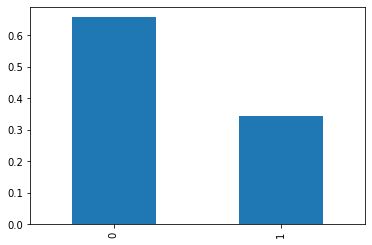

In [27]:
df_train['CLAIM_FLAG'].value_counts(normalize = True).plot(kind = 'bar')


### Highly imbalanced dataset 
- target value
- 0: 
- 1: 


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='GENDER', ylabel='CLAIM_FLAG'>

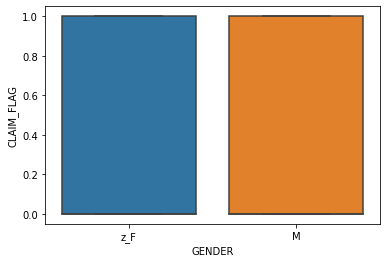

In [29]:
sns.boxplot(x='GENDER', y='CLAIM_FLAG', data=df_train)

<AxesSubplot:>

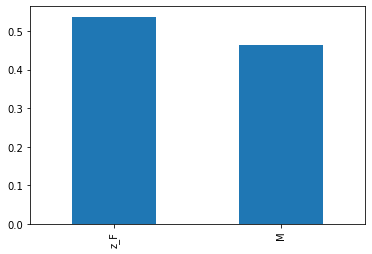

In [30]:
df_train['GENDER'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

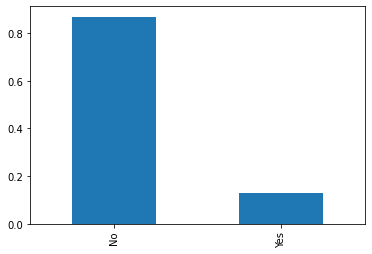

In [31]:
df_train['PARENT1'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

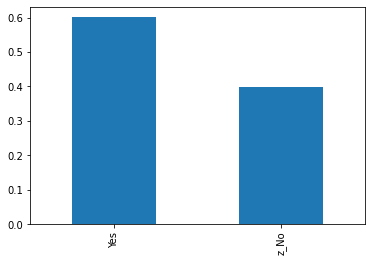

In [32]:
df_train['MSTATUS'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

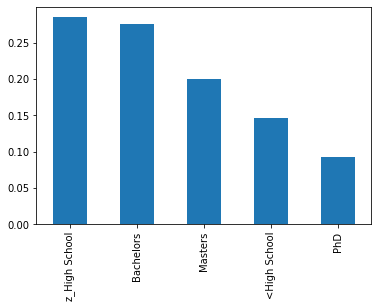

In [33]:
df_train['EDUCATION'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

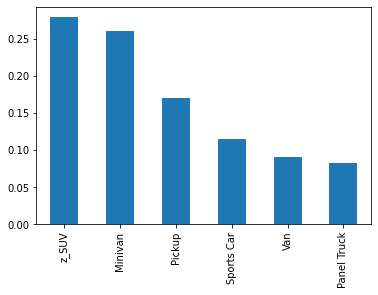

In [34]:
df_train['CAR_TYPE'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

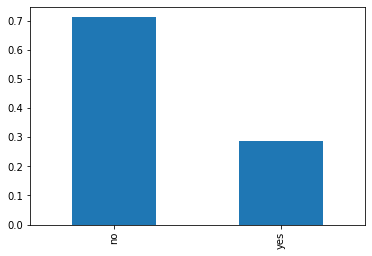

In [35]:
df_train['RED_CAR'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

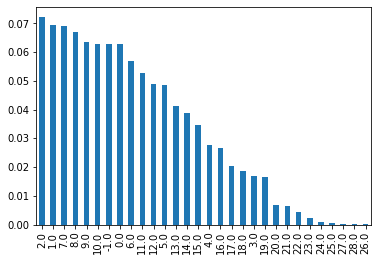

In [36]:
df_train['CAR_AGE'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

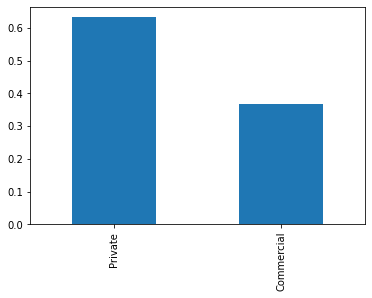

In [37]:
df_train['CAR_USE'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

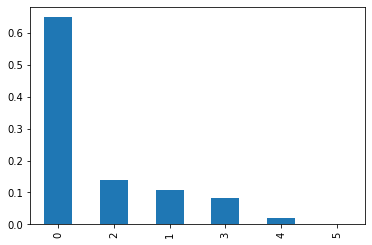

In [38]:
df_train['HOMEKIDS'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

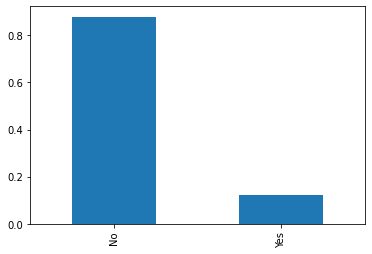

In [39]:
df_train['REVOKED'].value_counts(normalize = True).plot(kind = 'bar')

In [40]:
import matplotlib as plt

<AxesSubplot:>

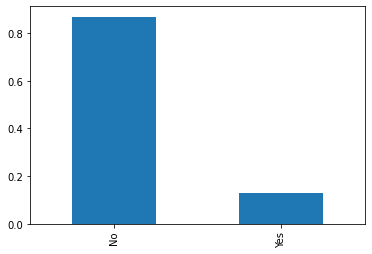

In [41]:
df_train['PARENT1'].value_counts(normalize = True).plot(kind = 'bar')

In [42]:
df_train['GENDER'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [ ]:
df_train.head()

In [ ]:
df_train.info()

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

## Clean the data, remove correlated features and apply some data preprocessing techniques

In [ ]:
# Code starts here











# Code ends here.

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [ ]:
# Code Starts here



# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [ ]:
# Code Starts here



# Code ends here